# ANOVA (Análisis de la varianza)

(15 de Marzo de 2022)

## Introducción

**Analisis del efecto de una reserva marina**

En este jupyter, vamos a realizar el analisis de un estudio experimental, en el cual analizaremos el efecto de una AMP (Area Marina Protegida).

Para ello, analizaremos el efecto de la distancia a la AMP a 3 niveles (Cerca, Medio y Lejos), así como, el efecto de la estacionalidad (Verano, Primavera e Invierno) en la abundancia de las muestras recogidas.


### Txt or Excel File

En el archivo txt o excel vamos a encontrar 1º Factores y 2º Variables

Factores:
- **Distancia**: Cerca, Medio y Lejos
- **Epoca:** Verano, Primavera e Invierno

Variable:
- abu: **abundancia**
<br>

## Hipotesis principal

- H0: Si existe un proceso de exportación (Se capturaría más en cerca)
- Ha: No existe ese proceso de exportación 

El factor principal es la **distancia** mientras que la variable principal es la **abundancia**.



### Hipotesis ANOVA 

- H0: Todas las medias son iguales | (B = ?)
- Ha: Al menos 1 es diferente | (alpha = 0.05)

### Tipos de Variabilidad

- Variabilidad **entre factores** (Diferencia entre las medias de los distintos niveles).
- Variabilidad **dentro de los niveles** (Diferencia debido a ala aleatoriedad).



Diferencia entre estas variabilidades:

    E --> Entre
    D --> Dentro
    
- E < D --> **NO efecto** del factor (<1)
- E = D --> **NO efecto** del factor (=1)
- E > D --> **PUEDE haber efecto** del factor (>1) 


# Analisis estadístico con Python

## Importamos nuestras librerías


In [1]:
# To handle the data
import pandas as pd
import numpy as np

# To make visualizations
#================================
import matplotlib.pyplot as plt
import seaborn as sns

# To evaluate the model
#================================
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag


# Others
import warnings
warnings.filterwarnings("ignore")

# Matplotlib settings
plt.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")
# plt.style.use("default")

## Importamos nuestro dataset

In [28]:
df_pescas = pd.read_csv("pescas_dataset.txt", sep="\t")

df_pescas.head()

,distancia,abu
0,C,5
1,C,3
2,C,5
3,C,3
4,C,7


In [29]:
df_pescas.tail()

,distancia,abu
319,L,24
320,L,14
321,L,22
322,L,11
323,L,6


## Analizamos describiendo el dato

Nos encontramos con un dataset que contiene **324 registros**, correspondientes a cada una de las muestras que se tomaron para realizar este diseño experimental.

### ¿Contamos con todas las variables en nuestro dataset?

En este caso, contamos correctamente el factor y la variable independiente anteriormente mencionadas.

In [30]:
df_pescas.shape

(324, 2)

In [31]:
print(df_pescas.columns.values)

['distancia' 'abu']


# Visualización de datos con Python

Al comenzar un estudio analítico, siempre hay que realizar un par de graficos puesto que es la mejor manera de entender como estan distribuidos nuestros datos.

## Librerias para visualización de datos.

Las librerias para visualización del dato que vamos a utilizar son: **matplotlib y seaborn.**


En este caso, vamos a comenzar gráficando **la variable y el factor principal** de estudio.


## Objetivo principal:

¿Se observa un efecto de la reserva marina de Tabarca en la captura de peces? (Existe proceso de importación)
    
### Otros objetivos:

- ¿Como se comporta la variable abundancia?¿Sigue una distribución normal?
- ¿Existe interacción entre factores?
    

**¿Existe proceso de importación?**

Para ver, si hay diferencias en las muestras, vamos a graficar la variable abundancia (variable principal) respecto al factor distancia (factor principal).


**¿La variable principal sigue una distrbución normal?¿Que tipo de distr.?**

Abundancia es una variable continua.

Un par de gráficos que nos ofrecen mucha información acerca de su distribución,
así como, de sus estadisticos básicos son el Boxplot o el Violinplot.

Con la libreria seaborn ambos son muy faciles de usar y apenas hay diferencias
en su código.

Dicho esto, **¡pasamos a gráficar!**

## Efecto del factor principal (Distancia)

- El grupo de Cerca muestra una mayor abundancia (15) en las capturas respecto a los grupos de Medio (11.9) y Lejos (12.6).

- Tanto Medio (11,9) como lejos (12,6) muestran tasas de abundancia menores a la media (13,2). 

- Mismo proceso utilizando como estadístico la mediana.




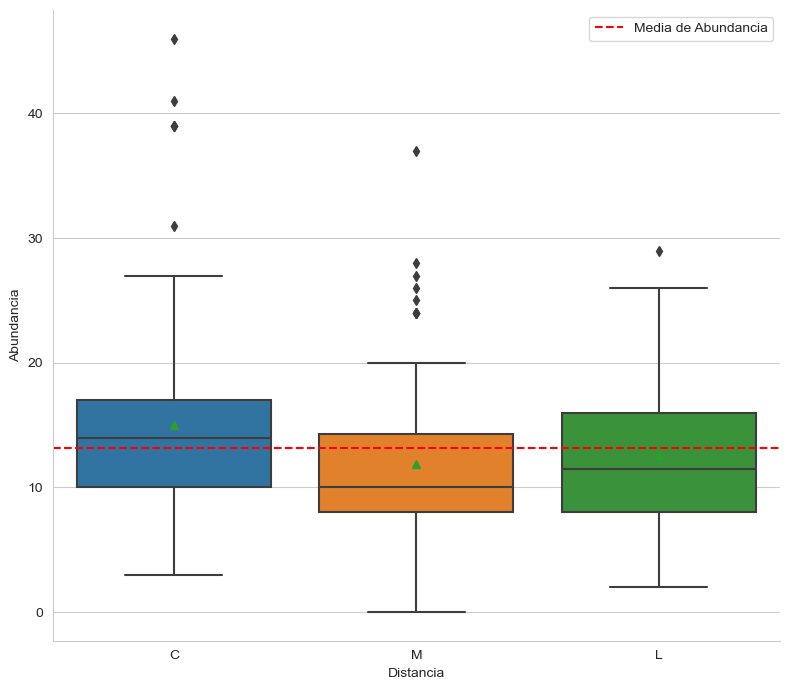

In [32]:
# Creación de boxplot (diagrama de cajas)
# ==================================================

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,7))

ax = sns.boxplot(data= df_pescas,
                  x = "distancia",
                  y = "abu",
                  showmeans=True
                  )


ax.axhline(y= df_pescas["abu"].mean(), 
            color= "r",
            linestyle= "--",
            label= "Media de Abundancia")

# ax.axhline(y= df_tabarca["abu"].median(), 
#             color= "b",
#             linestyle= "-.",
#             label= "Mediana de Abundancia")


ax.set(xlabel= "Distancia", ylabel= "Abundancia")
sns.despine()
ax.legend()

fig.tight_layout()


### Observando estadísticos

- En ambos casos (media y mediana), se observa un efecto positivo en las pescas de C respecto a M y L.

In [33]:
# Sacamos los estadísticos a relucir
#=====================================

print("Media C:", round(df_pescas[df_pescas["distancia"] == "C"]["abu"].mean(), 1))
print("Media M:", round(df_pescas[df_pescas["distancia"] == "M"]["abu"].mean(), 1))
print("Media L:",round(df_pescas[df_pescas["distancia"] == "L"]["abu"].mean(), 1))

print("\nMedia Abundancia: ", round(df_pescas["abu"].mean(), 1))

print("--"*20)

print("Mediana C:", round(df_pescas[df_pescas["distancia"] == "C"]["abu"].median(), 1))
print("Mediana M:", round(df_pescas[df_pescas["distancia"] == "M"]["abu"].median(), 1))
print("Mediana L:", round(df_pescas[df_pescas["distancia"] == "L"]["abu"].median(), 1))

print("\nMediana Abundancia: ", round(df_pescas["abu"].median(), 1))



Media C: 15.0
Media M: 11.9
Media L: 12.6

Media Abundancia:  13.2
----------------------------------------
Mediana C: 14.0
Mediana M: 10.0
Mediana L: 11.5

Mediana Abundancia:  12.0


## Comportamiento de Abundancia

Para observar, como se distribuye la variable abundancia, vamos a hacer uso de dos gráficas muy interesantes para estos casos, a saber:

- QQplot
- Histplot

En este caso, vamos a crear una función que nos permita, en otras ocasiones, utilizarla de nuevo para ver el comportamiento de x o y variable.


- La variable abundancia presenta una ditribución ligeramente sesgada hacia la derecha de la distribución.

Esto se debe probablemente a valores de abundancia que superan por mucho los valores más abundantes en nuestra distribución.

- El comportamiento conforme avanzamos en la ditribución se aleja de una relación lineal y tiende a un comportamiento exponencial

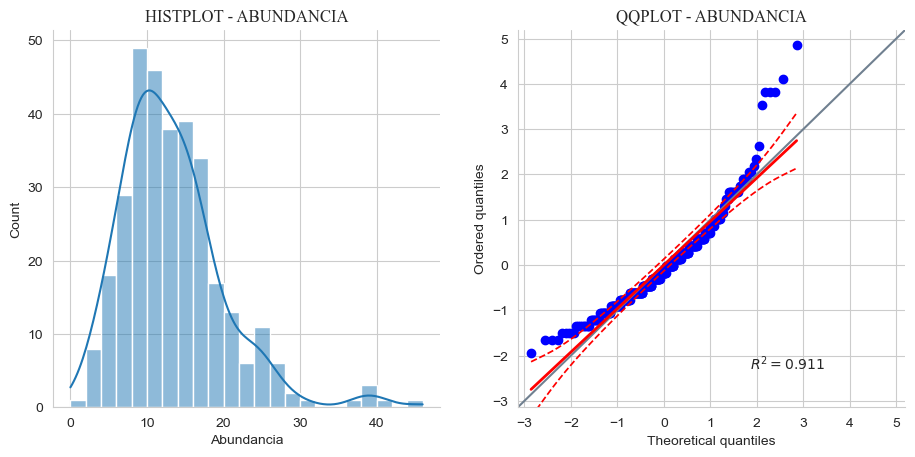

In [34]:
# Creamos la función
#=========================================

def norm_plots(df, x, x_label):
    
    """
    df: select your dataframe
    var: select your variable to analyse (str)
    
    var_name: select a name for your variable (str)
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

    sns.histplot(data= df,
                  x= x,
                  kde= True,
                  ax= axes[0])
    
    axes[0].set(xlabel= x_label, ylabel= "Count")
    axes[0].set_title("HISTPLOT - {}".format(x_label).upper(), fontname="Times New Roman")

    pg.qqplot(df[x], dist='norm', ax=axes[1])
    axes[1].set_title("QQPLOT - {}".format(x_label).upper(), fontname="Times New Roman")

    sns.despine()
    
    return

norm_plots(df= df_pescas, x= "abu", x_label="Abundancia")

# Requisitos para realizar ANOVA

- Independencia de los datos
- Normalidad de los datos
- Homogeneidad de las varianzas


## Evaluamos la normalidad

**Por Contrastes de Hipotesis:**

- Shapiro-Wilk (recomendado)
- Kolgomorov-Smirnov

**Por metodos visuales:**

- Histogramas
- Q-Q plots


Creamos subconjuntos de C, M y L para la variable abundancia

In [36]:
cerca = df_pescas[df_pescas["distancia"] == "C"]["abu"]
medio = df_pescas[df_pescas["distancia"] == "M"]["abu"]
lejos = df_pescas[df_pescas["distancia"] == "L"]["abu"]

print(cerca.shape, medio.shape, lejos.shape)

(108,) (108,) (108,)


In [37]:
print("Shapiro Test:\n")

_, pval = stats.shapiro(cerca)
print("P-value: {:.2}".format(pval))


_, pval = stats.shapiro(medio)
print("P-value: {:.2}".format(pval))

_, pval = stats.shapiro(lejos)
print("P-value: {:.2}".format(pval))



Shapiro Test:

P-value: 2.3e-08
P-value: 2.1e-06
P-value: 0.028


In [38]:
pg.normality(data=df_pescas, dv='abu', group='distancia')

,W,pval,normal
C,0.867948,2.308101e-08,False
M,0.910296,2.071459e-06,False
L,0.973292,2.838510e-02,False


### Metodo Visual

#### HISTPLOT

Utilizamos un histrograma para observar como se distribuyen.

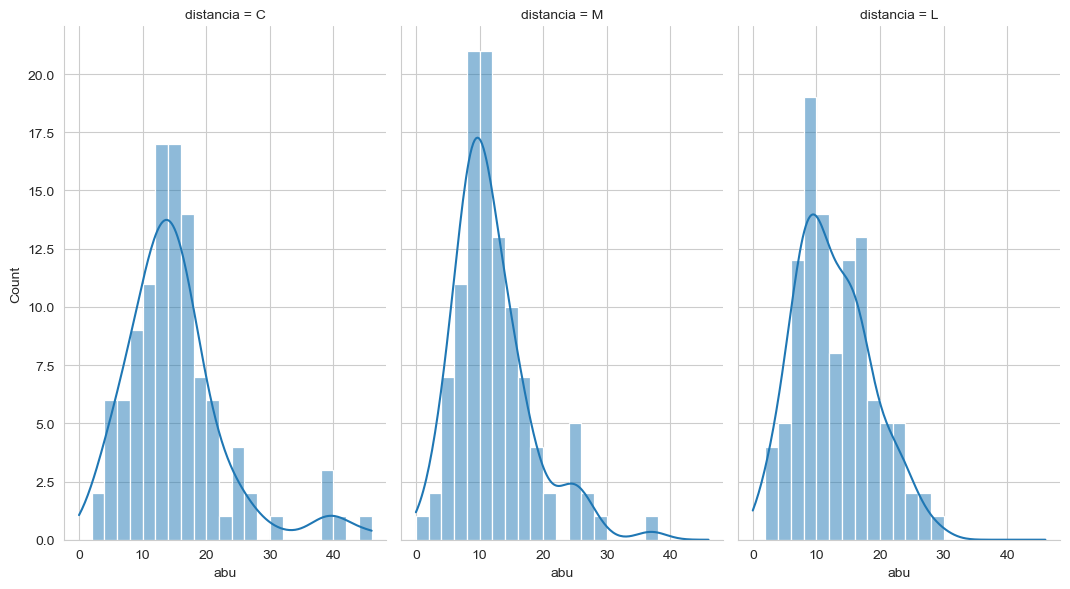

In [59]:
ax = sns.displot(data= df_pescas,
            x="abu",
            col="distancia",
            kde= True,
            height= 6,
            aspect=.6,
            facet_kws=dict(margin_titles=True))

ax.tight_layout()

#### QQ plot 

Igual que en el ejemplo anterior graficamos la variable y el factor principal que serían abundancia y distancia a la AMP.

Q-Q plot (con la libreria pingouin)

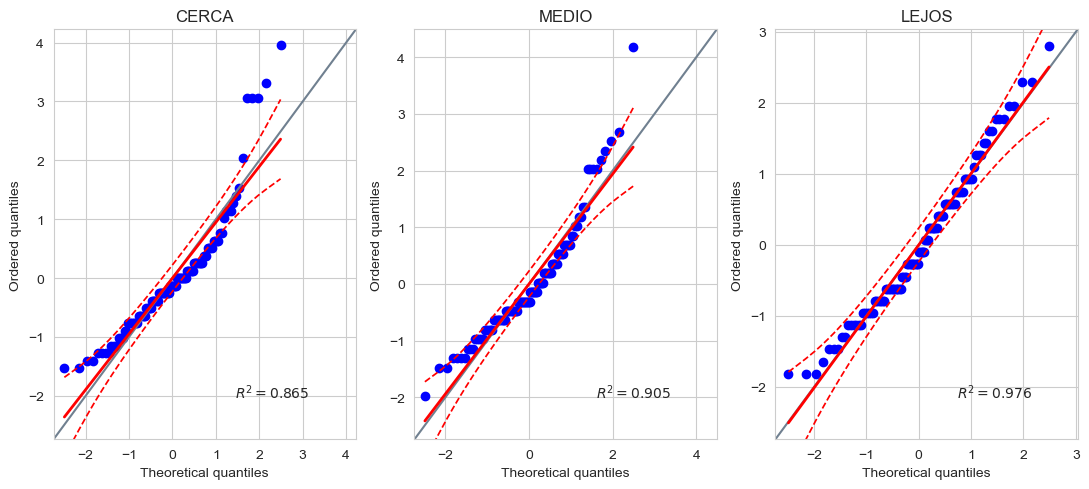

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(11, 5))

pg.qqplot(cerca, dist='norm', ax=axes[0])
pg.qqplot(medio, dist='norm', ax=axes[1])
pg.qqplot(lejos, dist='norm', ax=axes[2])


axes[0].set_title("CERCA")
axes[1].set_title("MEDIO")
axes[2].set_title("LEJOS")


fig.tight_layout()

## Evaluamos Homogeneidad

Para ello:
    
- Test de Bartlett (sensible a no normalidad)
- Test de Levene (alternativa al test de Bartlett, en el caso de que existan desviaciones significativas de la normalidad.)
    
Contraste de hipotesis:
    
- H0: Las varianzas son iguales (beta = ?)
- Ha: Al menos 1 es diferente (alpha = 0.05)

Test de barlett no le importa si esta balanceado el modelo (mismo numero de muestras por nivel).

En este caso, sí lo esta (108,108,108).


Sí alpha < 0.05 Se rechaza H0 (No homogeneidad).

Se podría realizar una transformación de los datos, las mas comunes:
- Raiz cuadrada (np.sqrt(abu+1))
- Logarítmica (np.log(abu+1))


Para tranformar los datos, usamos siempre en primer lugar la raiz cuadrada, sí
se rechaza H0, entonces aplicariamos la transformació logarítmica.


Sí se rechazase aun habiendo transformado podemos optar a una ultima solución,
siempre que:
    
- Hay un gran numero de tratamientos y/o réplicas (Más de 30 muestras)
- Datos balanceados

En este caso, realizo el anova sin transformar y observo si hay un cambio significativo
pero cambiando el alpha a a 0.01.


**Observaciones**

Con la transformación por raiz cuadrada se cumple la homogeneidad de varianzas, por ende, realizariamos el anova de este modelo con la variable abundancia transformada por la raiz cuadrdada.


In [64]:

print("Test de Bartlett:")

_, pval = stats.bartlett(cerca, medio, lejos)
print("P-value: {:.2}\n".format(pval))


print("Test de Levene:")

_, pval = stats.levene(cerca, medio, lejos)
print("P-value: {:.2}\n".format(pval))




print("Transformación por Raiz Cuadrada:")

_, pval = stats.bartlett(np.sqrt(cerca+1),
                          np.sqrt(medio+1),
                          np.sqrt(lejos+1))

print("P-value: {:.2}\n".format(pval))


print("Tranformación Logarítmica:")

_, pval = stats.bartlett(np.log(cerca+1),
                          np.log(medio+1),
                          np.log(lejos+1))

print("P-value: {:.2}".format(pval))



Test de Bartlett:
P-value: 0.0027

Test de Levene:
P-value: 0.3

Transformación por Raiz Cuadrada:
P-value: 0.32

Tranformación Logarítmica:
P-value: 0.91


### Metodo Visual 

#### Boxplot (mediante catplot)

En este caso, podemos realizarnos varias preguntas sobre la variable, realizar gráficos de 1 o más factores. Para ello, vamos a utilizar la funcion  catplot que nos permite realizar multiples gráficas con unas pocas lineas de código.


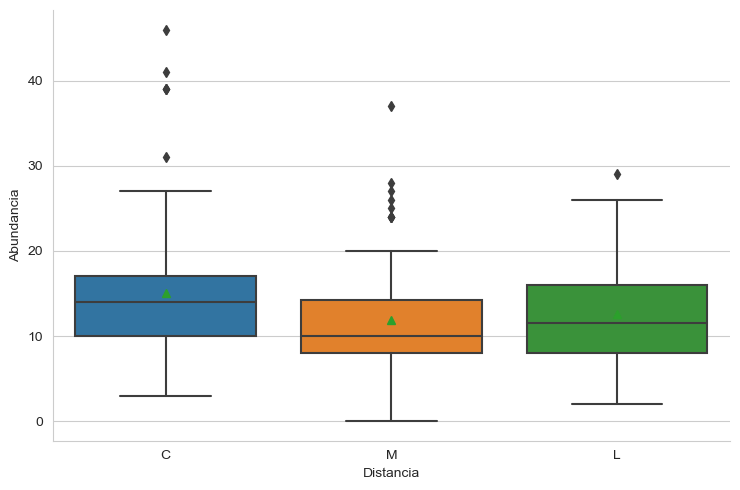

In [68]:

g = sns.catplot(data= df_pescas,
                x= "distancia",
                y= "abu",
                kind= "box",
                height= 5,
                aspect= 1.5,
                showmeans= True
                )

g.set(xlabel= "Distancia", ylabel= "Abundancia")
g.tight_layout()


# Construimos el ANOVA 

## Hipotesis ANOVA 

- H0: Todas las medias son iguales | (B = ?)
- Ha: Al menos 1 es diferente | (alpha = 0.05)

In [70]:
aov = pg.anova(data=df_pescas,
                  dv="abu",
                  between="distancia",
                  detailed=True)

aov

,Source,SS,DF,MS,F,p-unc,np2
0,distancia,588.895062,2,294.447531,6.63992,0.001494,0.039727
1,Within,14234.759259,321,44.345044,NaN,NaN,NaN


El estadístico muestra un pvalue < 0.01 por lo que nos encontrariamos en la region de rechazo:

- Rechazamos Ho 

Al menos 1 media es diferente



## Comparaciones múltiples a posterioir (post-hoc)

En este caso, realizamos comparaciones 2 a 2 utilizando el test de TuckeyHSD para estas comparaciones.

H0: Las muestras son iguales | B?
Ha: Las muestras son diferentes | alpha=0.05



In [72]:
pg.pairwise_tukey(data=df_pescas, dv='abu', between='distancia').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,C,L,15.019,12.602,2.417,0.906,2.667,0.022,0.362
1,C,M,15.019,11.861,3.157,0.906,3.484,0.002,0.472
2,L,M,12.602,11.861,0.741,0.906,0.817,0.693,0.111


En este caso, encontramos podemos encontrar un subconjunto homogeneo siendo este M-L.

# Conclusiones

La abundancia en C es mayor y ademas, se encuentran diferencias significativas con M y L. Siendo estos, subconjuntos homogeneos.

Por lo que, podriamos afirmar que existe un efecto en la abundancia de las capturas de peces por la Area Marina Protegida.

# Información de la sesión

In [75]:
# Session info

from sinfo import sinfo
sinfo()

-----
matplotlib  3.3.2
numpy       1.19.2
pandas      1.4.0
pingouin    0.5.1
scipy       1.8.0
seaborn     0.11.1
sinfo       0.3.1
statsmodels 0.13.2
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
jupyterlab          2.2.6
notebook            6.4.5
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
-----
Session information updated at 2022-04-25 12:50
